In [120]:
%load_ext autoreload
%autoreload 2
%matplotlib inline

The autoreload extension is already loaded. To reload it, use:
  %reload_ext autoreload


In [121]:
#from analysis import download_database
#download_database()

In [124]:
from analysis import DataBase
data = DataBase('equipsy.ABETdb')
group_experiments = data.get_group_experiments()

-- ----------------------------------------------------------
-- MDB Tools - A library for reading MS Access database files
-- Copyright (C) 2000-2011 Brian Bruns and others.
-- Files in libmdb are licensed under LGPL and the utilities under
-- the GPL, see COPYING.LIB and COPYING files respectively.
-- Check out http://mdbtools.sourceforge.net
-- ----------------------------------------------------------

-- That file uses encoding UTF-8

CREATE TABLE `tbl_Schedules`
 (
	`SID`			int not null auto_increment unique, 
	`SName`			varchar (100), 
	`SEnviro`			varchar (50), 
	`SMachineName`			varchar (30), 
	`SVersion`			varchar (10), 
	`SRunDate`			datetime, 
	`SFinal`			boolean NOT NULL, 
	`ZE_GUID`			varchar (50), 
	`ZS_GUID`			varchar (50), 
	`SRecCount`			int
);

-- CREATE INDEXES ...
ALTER TABLE `tbl_Schedules` ADD PRIMARY KEY (`SID`);

CREATE TABLE `tbl_Schedule_Notes`
 (
	`SID`			int, 
	`NName`			varchar (100), 
	`NValue`			text
);

-- CREATE INDEXES ...

CREATE TABLE `tbl_Data`
 (


No MSysRelationships


tbl_Schedules <_io.StringIO object at 0x7fd612ce89d0>
tbl_Schedule_Notes <_io.StringIO object at 0x7fd652cf9940>
tbl_Data <_io.StringIO object at 0x7fd612ccb280>
tbl_Version <_io.StringIO object at 0x7fd652cf9940>
tbl_Zip_Schedule <_io.StringIO object at 0x7fd612ccb280>
tbl_Zip_Environment <_io.StringIO object at 0x7fd652cf9940>


{'A1': [285.0, 286.0], 'A2': [304.0, 306.0], 'B1': [299.0, 295.0], 'B2': [302.0, 305.0], 'C1': [285.0, 284.0], 'C2': [289.0, 289.0], 'D1': [310.0, 307.0], 'D2': [297.0, 296.0], 'E1': [339.0, 343.0], 'E2': [307.0, 308.0], 'F1': [303.0, 305.0], 'F2': [302.0, 301.0], 'G1': [306.0, 306.0], 'G2': [294.0, 295.0], 'H1': [270.0, 269.0], 'H2': [305.0, 304.0]} ['15/01/24', '16/01/24']


NameError: name 'key' is not defined

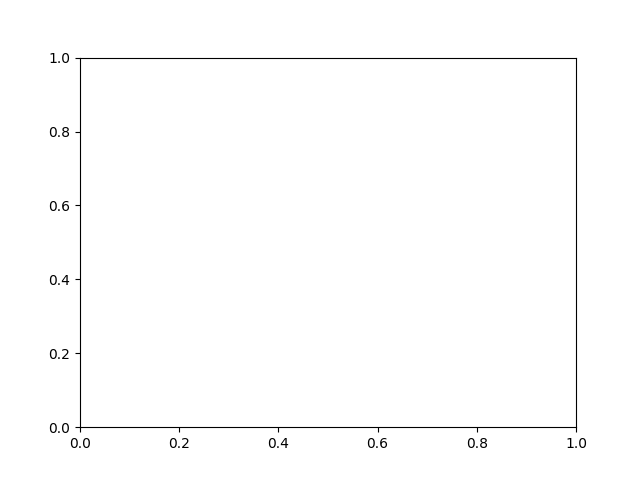

In [136]:
from plotting import *
display_weights(group_experiments)

In [131]:
a = group_experiments.get_experiments_per_animal('A1')

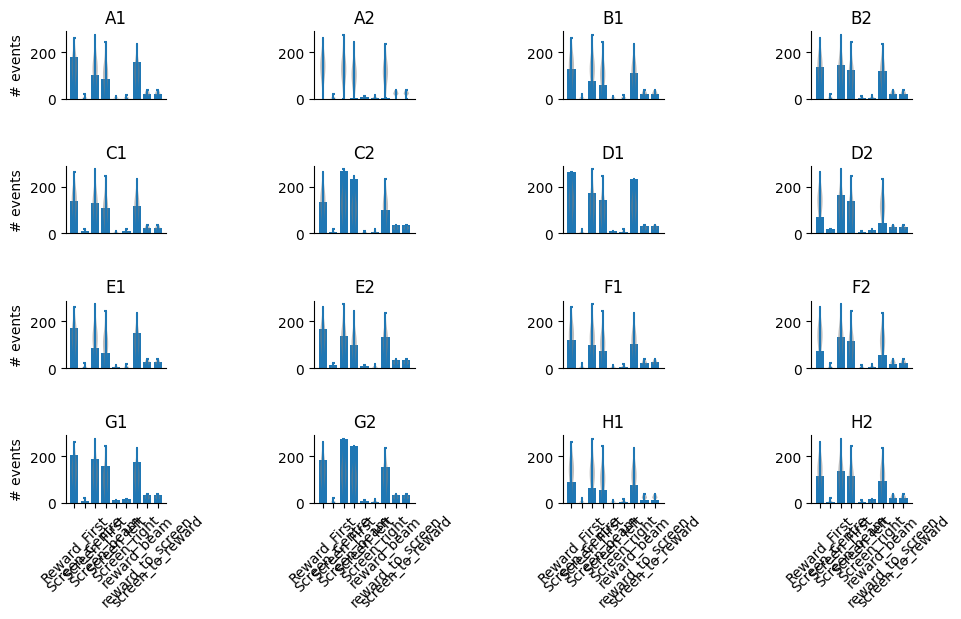

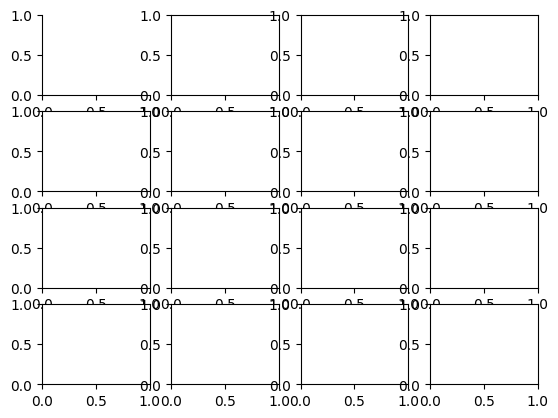

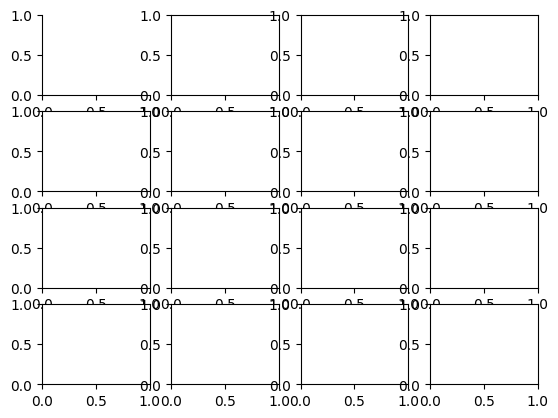

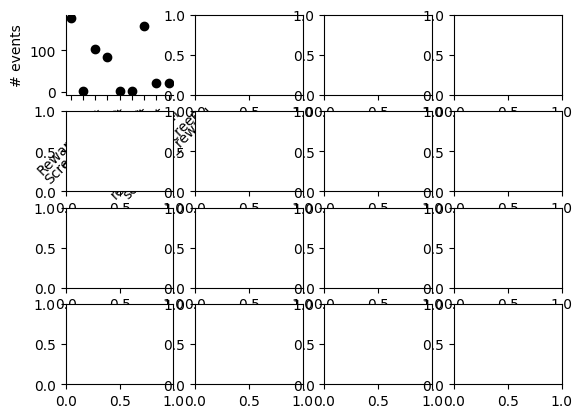

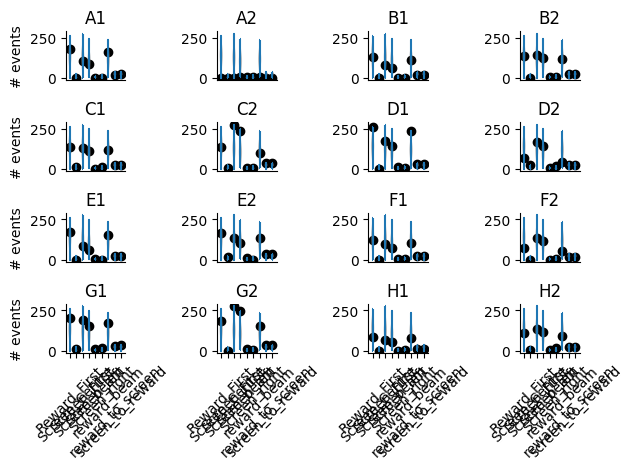

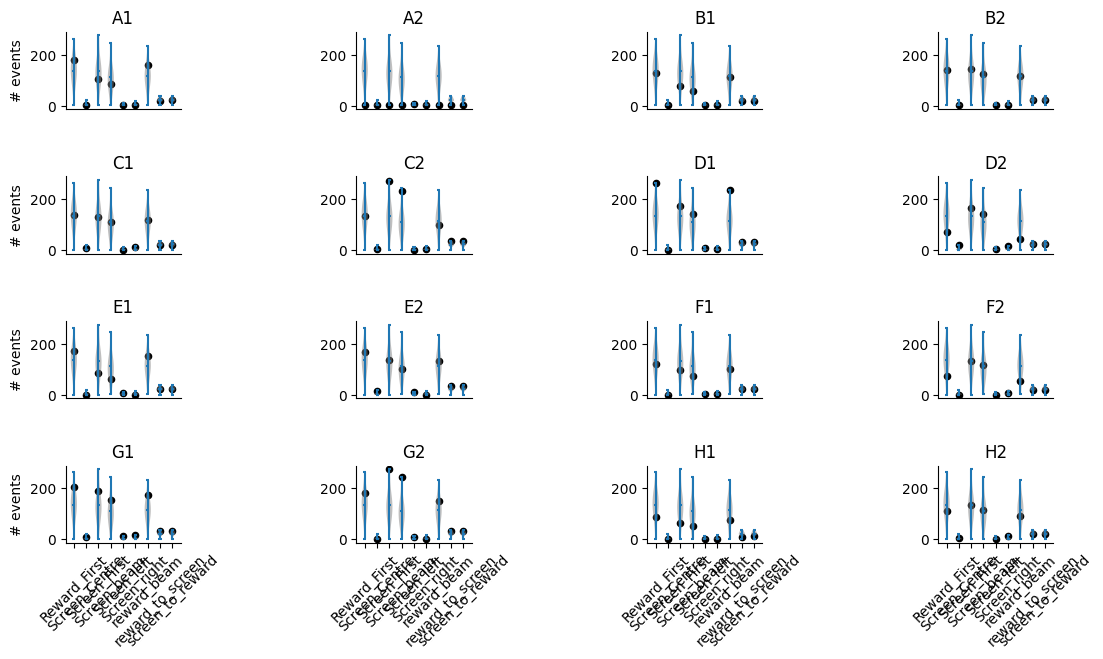

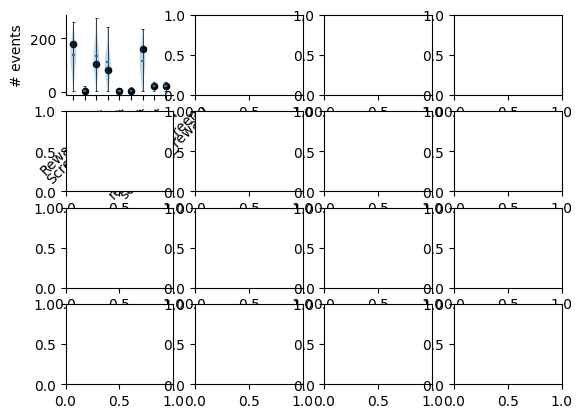

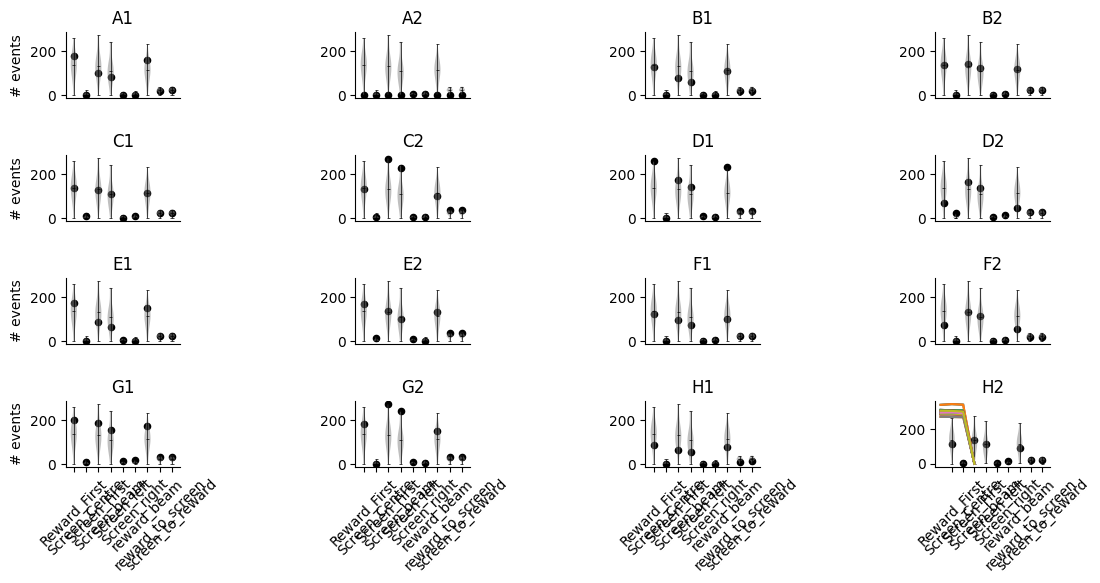